 ## Exploratory data analysis

 1. Check column data types
     1. Check column values
     2. Check target column value distribution 
     3. Identify key columns
 2. Clean Data
     1. Identify key columns
     2. Format columns
 4. Correlation matrix

We start with importing the .csv file containing the sales data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

df = pd.read_csv('sales_data_2015.csv', index_col=0, low_memory=False)

df.head()

,Sale_id,bbl_id,year,borough,bldg_ctgy,tax_cls_p,block,lot,easmnt,bldg_cls_p,...,land_sqft,tot_sqft,yr_built,tax_cls_s,bldg_cls_s,sale_date,price,usable,long,lat
0,1,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,A9,...,4750,2619,1899,1,A9,08-07-15,0,N,-73.901338,40.841229
1,2,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,A9,...,4750,2619,1899,1,A9,08-07-15,0,N,-73.901338,40.841229
2,3,230352,2015,2,01 ONE FAMILY DWELLINGS,1,3035,2,NaN,S1,...,1287,2528,1899,1,S1,12/18/2015,0,N,-73.898331,40.848648
3,4,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,S1,...,2500,2452,1910,1,S1,08/18/2015,0,N,-73.893338,40.856136
4,5,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,S1,...,2500,2452,1910,1,S1,07-01-15,400000,Y,-73.893338,40.856136


The data has 26 dimensions, which are listed below.
Some of the attribute names are quite ambiguous, such are the codes for tax and building classes. For more information you can have a look at

https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

and 

https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html .

### 1. Check column data types

Next we check how big the dataset is and how many entries we got

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84768 entries, 0 to 84767
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sale_id     84768 non-null  int64  
 1   bbl_id      84768 non-null  int64  
 2   year        84768 non-null  int64  
 3   borough     84768 non-null  int64  
 4   bldg_ctgy   84768 non-null  object 
 5   tax_cls_p   84765 non-null  object 
 6   block       84768 non-null  int64  
 7   lot         84768 non-null  int64  
 8   easmnt      1 non-null      object 
 9   bldg_cls_p  84765 non-null  object 
 10  address     84768 non-null  object 
 11  apt         20983 non-null  object 
 12  zip         84768 non-null  int64  
 13  res_unit    84768 non-null  int64  
 14  com_unit    84768 non-null  int64  
 15  tot_unit    84768 non-null  int64  
 16  land_sqft   84768 non-null  int64  
 17  tot_sqft    84768 non-null  int64  
 18  yr_built    84768 non-null  int64  
 19  tax_cls_s   84768 non-nul

In [ ]:
# All different categories of houses
df.bldg_ctgy.unique()

array(['01  ONE FAMILY DWELLINGS', '02  TWO FAMILY DWELLINGS',
       '03  THREE FAMILY DWELLINGS', '05  TAX CLASS 1 VACANT LAND',
       '07  RENTALS - WALKUP APARTMENTS',
       '08  RENTALS - ELEVATOR APARTMENTS',
       '09  COOPS - WALKUP APARTMENTS', '10  COOPS - ELEVATOR APARTMENTS',
       '21  OFFICE BUILDINGS', '22  STORE BUILDINGS', '27  FACTORIES',
       '29  COMMERCIAL GARAGES', '30  WAREHOUSES',
       '31  COMMERCIAL VACANT LAND', '32  HOSPITAL AND HEALTH FACILITIES',
       '41  TAX CLASS 4 - OTHER', '06  TAX CLASS 1 - OTHER',
       '35  INDOOR PUBLIC AND CULTURAL FACILITIES',
       '04  TAX CLASS 1 CONDOS', '14  RENTALS - 4-10 UNIT',
       '17  CONDO COOPS', '33  EDUCATIONAL FACILITIES',
       '37  RELIGIOUS FACILITIES', '43  CONDO OFFICE BUILDINGS',
       '12  CONDOS - WALKUP APARTMENTS',
       '13  CONDOS - ELEVATOR APARTMENTS', '26  OTHER HOTELS',
       '36  OUTDOOR RECREATIONAL FACILITIES', '44  CONDO PARKING',
       '11A CONDO-RENTALS', '15  CONDOS - 2-10

In [ ]:
## Building classes
df.bldg_cls_p.unique()

array(['A9', 'S1', 'A1', 'B1', 'S2', 'B3', 'B2', 'B9', 'C0', 'V3', 'V0',
       'C1', 'C7', 'D1', 'C6', 'D4', 'O7', 'O1', 'K1', 'K2', 'F1', 'F9',
       'G2', 'G9', 'G7', 'G6', 'E3', 'E1', 'K9', 'V1', 'I5', 'I9', 'Z9',
       'A5', 'A2', 'A0', 'A4', 'Z0', 'C3', 'F4', 'E9', 'P5', 'R3', 'G0',
       'C2', 'C4', 'D7', 'S9', 'S3', 'R9', 'K4', 'W2', 'M9', 'M4', 'M1',
       'RB', 'R2', 'O9', 'M3', 'F5', 'R4', 'G8', 'I7', 'P6', 'D3', 'H3',
       'A6', 'A3', 'O5', 'Q8', 'RG', 'O6', 'P2', 'D5', 'D9', 'V9', 'S5',
       'G1', 'C5', 'O8', 'E4', 'RR', 'G4', 'I6', 'RP', 'S4', 'K3', 'V2',
       'W6', 'R1', 'N9', 'K7', 'F2', 'W1', 'D6', 'C9', 'G5', 'I1', 'W9',
       'RK', 'J8', 'P9', 'K5', 'A8', 'V6', 'R8', 'R5', 'R6', 'C8', 'RA',
       'RS', 'K6', 'Q9', 'R0', 'A7', 'R7', 'O3', 'I4', 'U8', 'L9', 'T9',
       'S0', 'D0', nan, 'P3', 'Q2', 'RT', 'H4', 'W3', 'M2', 'E7', 'RW',
       'F8', 'J6', 'W8', 'N2', 'U7', 'D8', 'L8', 'W7', 'J2', 'O2', 'L1',
       'H2', 'HR', 'O4', 'U0', 'L3', 'L2', 'H1', 'HB

In [ ]:
## Different building categories
df.groupby('bldg_ctgy')['Sale_id'].nunique()

bldg_ctgy
01  ONE FAMILY DWELLINGS                       16029
02  TWO FAMILY DWELLINGS                       14373
03  THREE FAMILY DWELLINGS                      4082
04  TAX CLASS 1 CONDOS                          1426
05  TAX CLASS 1 VACANT LAND                     1120
06  TAX CLASS 1 - OTHER                          153
07  RENTALS - WALKUP APARTMENTS                 4034
08  RENTALS - ELEVATOR APARTMENTS                500
09  COOPS - WALKUP APARTMENTS                   2770
10  COOPS - ELEVATOR APARTMENTS                13323
11  SPECIAL CONDO BILLING LOTS                     2
11A CONDO-RENTALS                                 29
12  CONDOS - WALKUP APARTMENTS                   687
13  CONDOS - ELEVATOR APARTMENTS               11880
14  RENTALS - 4-10 UNIT                          738
15  CONDOS - 2-10 UNIT RESIDENTIAL              1101
16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      109
17  CONDO COOPS                                 1442
18  TAX CLASS 3 - UNTILITY PROPERTIE

In [ ]:
print(df.describe())

            Sale_id        bbl_id     year       borough         block  \
count  84768.000000  8.476800e+04  84768.0  84768.000000  84768.000000   
mean   42384.500000  5.552786e+07   2015.0      2.815968   3922.271812   
std    24470.558146  1.137808e+08      0.0      1.331564   3505.674705   
min        1.000000  0.000000e+00   2015.0      1.000000      1.000000   
25%    21192.750000  1.195860e+06   2015.0      1.000000   1169.000000   
50%    42384.500000  4.222320e+06   2015.0      3.000000   2657.000000   
75%    63576.250000  4.130948e+07   2015.0      4.000000   5878.000000   
max    84768.000000  5.786011e+08   2015.0      5.000000  16322.000000   

                lot           zip      res_unit      com_unit      tot_unit  \
count  84768.000000  84768.000000  84768.000000  84768.000000  84768.000000   
mean     395.336342  10795.058430      2.206882      0.213842      2.482894   
std      671.917553    640.425751     33.803117      3.328458     34.129612   
min        1.0000

### 3. Identify Focus/Key columns

In [ ]:
original_categorical_columns = ['Sale_id','bbl_id', 'borough', 'bldg_ctgy',  'tax_cls_p', 'block', 'lot', 'easmnt', 'bldg_cls_p', 'address', 'apt', 'zip', 'tax_cls_s', 'bldg_cls_s', 'usable']
original_numerical_columns = ['year', 'res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'yr_built', 'sale_date', 'price', 'long', 'lat' ]
original_columns = np.concatenate((original_categorical_columns, original_numerical_columns), axis=None)
print(len(original_columns))

# Removed: 'tax_cls_p', 'block', 'easmnt', 'bldg_cls_p', 'usable'
key_categorical_columns = ['Sale_id', 'bbl_id', 'borough', 'bldg_ctgy', 'address',  'block', 'lot', 'apt', 'zip', 'tax_cls_s', 'bldg_cls_s']
key_numerical_columns =  ['year', 'res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'tot_sqft', 'yr_built', 'sale_date', 'long','lat' ]
target_column = ['price']

key_columns = np.concatenate((key_categorical_columns, key_numerical_columns, target_column), axis=None)

print(key_columns)

25
['Sale_id' 'bbl_id' 'borough' 'bldg_ctgy' 'address' 'block' 'lot' 'apt'
 'zip' 'tax_cls_s' 'bldg_cls_s' 'year' 'res_unit' 'com_unit' 'tot_unit'
 'land_sqft' 'tot_sqft' 'yr_built' 'sale_date' 'long' 'lat' 'price']


## Data cleansing

#### Known issues
- [ ] NaNs / Non zero value
- [ ] Duplicates - Same property sold twice get recent one if Address && apartment appears twice
- [ ] Removing outliers - how can I remove values which doesn make sense e.g. some large proerties sold for $1
- [ ] Should I do somekind of clustering e.g. There are properties (land only) without building and build date
- [ ] Use built date to find age / But then what happens where there are no building? and no build age ( I could ignore them)?

#### Other questions
- [ ] how to know which ones are useful?
- [ ] how can I clean outliers? should I do some kind of things with the statistics above or just pick a value?


### 1. Prepare dataframe with key columns

In [ ]:
## Find out which one might be useful?
df2 = df[key_columns].copy()

In [ ]:
print(df2.describe())

            Sale_id        bbl_id       borough         block           lot  \
count  84768.000000  8.476800e+04  84768.000000  84768.000000  84768.000000   
mean   42384.500000  5.552786e+07      2.815968   3922.271812    395.336342   
std    24470.558146  1.137808e+08      1.331564   3505.674705    671.917553   
min        1.000000  0.000000e+00      1.000000      1.000000      1.000000   
25%    21192.750000  1.195860e+06      1.000000   1169.000000     22.000000   
50%    42384.500000  4.222320e+06      3.000000   2657.000000     50.000000   
75%    63576.250000  4.130948e+07      4.000000   5878.000000   1003.000000   
max    84768.000000  5.786011e+08      5.000000  16322.000000   9117.000000   

                zip     tax_cls_s     year      res_unit      com_unit  \
count  84768.000000  84768.000000  84768.0  84768.000000  84768.000000   
mean   10795.058430      1.820144   2015.0      2.206882      0.213842   
std      640.425751      0.961171      0.0     33.803117      3.32

#### 1. Create additional columns

In [ ]:
# Create Age column
df2["age"] = df["yr_built"].apply(lambda x : (2015 - x))

In [ ]:
# Create sales_datestamp column
df2['sale_datestamp'] = pd.to_datetime(df2['sale_date'])

In [ ]:
df2['gross_sqft'] = df2['tot_sqft'] + df2['land_sqft']

In [ ]:
# Update key columns
key_numerical_columns = np.concatenate((key_numerical_columns, ['age', 'sale_datestamp', 'gross_sqft']))
key_columns = np.concatenate((key_categorical_columns, key_numerical_columns, target_column), axis=None)

print(key_columns)
df2.head()

['Sale_id' 'bbl_id' 'borough' 'bldg_ctgy' 'address' 'block' 'lot' 'apt'
 'zip' 'tax_cls_s' 'bldg_cls_s' 'year' 'res_unit' 'com_unit' 'tot_unit'
 'land_sqft' 'tot_sqft' 'yr_built' 'sale_date' 'long' 'lat' 'age'
 'sale_datestamp' 'gross_sqft' 'price']


,Sale_id,bbl_id,borough,bldg_ctgy,address,block,lot,apt,zip,tax_cls_s,...,land_sqft,tot_sqft,yr_built,sale_date,long,lat,price,age,sale_datestamp,gross_sqft
0,1,2290528,2,01 ONE FAMILY DWELLINGS,1665 WASHINGTON AVENUE,2905,28,NaN,10457,1,...,4750,2619,1899,08-07-15,-73.901338,40.841229,0,116,2015-08-07,7369
1,2,2290528,2,01 ONE FAMILY DWELLINGS,1665 WASHINGTON AVENUE,2905,28,NaN,10457,1,...,4750,2619,1899,08-07-15,-73.901338,40.841229,0,116,2015-08-07,7369
2,3,230352,2,01 ONE FAMILY DWELLINGS,441 EAST 178 STREET,3035,2,NaN,10457,1,...,1287,2528,1899,12/18/2015,-73.898331,40.848648,0,116,2015-12-18,3815
3,4,2303936,2,01 ONE FAMILY DWELLINGS,455 EAST 184 STREET,3039,36,NaN,10458,1,...,2500,2452,1910,08/18/2015,-73.893338,40.856136,0,105,2015-08-18,4952
4,5,2303936,2,01 ONE FAMILY DWELLINGS,455 EAST 184 STREET,3039,36,NaN,10458,1,...,2500,2452,1910,07-01-15,-73.893338,40.856136,400000,105,2015-07-01,4952


#### 2. Format columns

In [ ]:
df2.fillna('', inplace=True)

# For apt only Replace None for apt with ''
df2.apt.replace(np.nan, '', regex=True)

df2.address = df2.address.apply(str)
df2.apt = df2.apt.apply(str)

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84768 entries, 0 to 84767
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sale_id         84768 non-null  int64         
 1   bbl_id          84768 non-null  int64         
 2   borough         84768 non-null  int64         
 3   bldg_ctgy       84768 non-null  object        
 4   address         84768 non-null  object        
 5   block           84768 non-null  int64         
 6   lot             84768 non-null  int64         
 7   apt             84768 non-null  object        
 8   zip             84768 non-null  int64         
 9   tax_cls_s       84768 non-null  int64         
 10  bldg_cls_s      84768 non-null  object        
 11  year            84768 non-null  int64         
 12  res_unit        84768 non-null  int64         
 13  com_unit        84768 non-null  int64         
 14  tot_unit        84768 non-null  int64         
 15  la

,Sale_id,bbl_id,borough,bldg_ctgy,address,block,lot,apt,zip,tax_cls_s,...,land_sqft,tot_sqft,yr_built,sale_date,long,lat,price,age,sale_datestamp,gross_sqft
0,1,2290528,2,01 ONE FAMILY DWELLINGS,1665 WASHINGTON AVENUE,2905,28,,10457,1,...,4750,2619,1899,08-07-15,-73.901338,40.841229,0,116,2015-08-07,7369
1,2,2290528,2,01 ONE FAMILY DWELLINGS,1665 WASHINGTON AVENUE,2905,28,,10457,1,...,4750,2619,1899,08-07-15,-73.901338,40.841229,0,116,2015-08-07,7369
2,3,230352,2,01 ONE FAMILY DWELLINGS,441 EAST 178 STREET,3035,2,,10457,1,...,1287,2528,1899,12/18/2015,-73.898331,40.848648,0,116,2015-12-18,3815
3,4,2303936,2,01 ONE FAMILY DWELLINGS,455 EAST 184 STREET,3039,36,,10458,1,...,2500,2452,1910,08/18/2015,-73.893338,40.856136,0,105,2015-08-18,4952
4,5,2303936,2,01 ONE FAMILY DWELLINGS,455 EAST 184 STREET,3039,36,,10458,1,...,2500,2452,1910,07-01-15,-73.893338,40.856136,400000,105,2015-07-01,4952


#### 3. Remove invalid values
First, we do some basic cleaning, that is removing NaN and zero-values.

In [ ]:
# Checking for NaN values
df2.isna().sum().sort_values(ascending=False)

gross_sqft        0
year              0
bbl_id            0
borough           0
bldg_ctgy         0
address           0
block             0
lot               0
apt               0
zip               0
tax_cls_s         0
bldg_cls_s        0
res_unit          0
sale_datestamp    0
com_unit          0
tot_unit          0
land_sqft         0
tot_sqft          0
yr_built          0
sale_date         0
long              0
lat               0
price             0
age               0
Sale_id           0
dtype: int64

We are going to fit a simple linear regression model on the data, using the property age and total area as independent and price as dependent variable. 

##### 3.1. Remove properties without a price

In [ ]:
# We also don't want any attibute to be 0, which is presumably a missing entry
print("Entries with incorrect price: ",len(df2[df2.price == 0]))
print("Original dataset length: ",len(df2))

df2 = df2[(df2.price != 0)]
df2.to_csv('valid_price.csv')
print("Cleaned dataset length: ", len(df2))
df2.head()

Entries with incorrect price:  24118
Original dataset length:  84768
Cleaned dataset length:  60650


,Sale_id,bbl_id,borough,bldg_ctgy,address,block,lot,apt,zip,tax_cls_s,...,land_sqft,tot_sqft,yr_built,sale_date,long,lat,price,age,sale_datestamp,gross_sqft
4,5,2303936,2,01 ONE FAMILY DWELLINGS,455 EAST 184 STREET,3039,36,,10458,1,...,2500,2452,1910,07-01-15,-73.893338,40.856136,400000,105,2015-07-01,4952
7,8,22912139,2,02 TWO FAMILY DWELLINGS,3823 3 AVENUE,2912,139,,10457,1,...,2000,2400,1993,08-04-15,-73.901430,40.837883,430000,22,2015-08-04,4400
8,9,22912152,2,02 TWO FAMILY DWELLINGS,517 EAST 171 STREET,2912,152,,10457,1,...,2000,2400,1993,06-02-15,-73.902418,40.837337,10000,22,2015-06-02,4400
9,10,22929126,2,02 TWO FAMILY DWELLINGS,1557 FULTON AVENUE,2929,126,,10457,1,...,3165,2394,1995,08-05-15,-73.899782,40.838008,505000,20,2015-08-05,5559
10,11,23030151,2,02 TWO FAMILY DWELLINGS,2264 WEBSTER AVENUE,3030,151,,10457,1,...,1620,3240,1931,09/28/2015,-73.895833,40.855842,490000,84,2015-09-28,4860


##### 3.2. Remove properties without a year

When doing so it will remove Lands - because lands doesn't have property

In [ ]:
# We also don't want any attibute to be 0, which is presumably a missing entry
print("Entries with incorrect year: ", len(df2[df2.yr_built == 0]))
print("Original dataset length: ",len(df2))

df2 = df2[(df2.yr_built != 0)]
df2.to_csv('valid_price.csv')
print("Cleaned dataset length: ", len(df2))

df2.head()

Entries with incorrect year:  3772
Original dataset length:  60650
Cleaned dataset length:  56878


,Sale_id,bbl_id,borough,bldg_ctgy,address,block,lot,apt,zip,tax_cls_s,...,land_sqft,tot_sqft,yr_built,sale_date,long,lat,price,age,sale_datestamp,gross_sqft
4,5,2303936,2,01 ONE FAMILY DWELLINGS,455 EAST 184 STREET,3039,36,,10458,1,...,2500,2452,1910,07-01-15,-73.893338,40.856136,400000,105,2015-07-01,4952
7,8,22912139,2,02 TWO FAMILY DWELLINGS,3823 3 AVENUE,2912,139,,10457,1,...,2000,2400,1993,08-04-15,-73.901430,40.837883,430000,22,2015-08-04,4400
8,9,22912152,2,02 TWO FAMILY DWELLINGS,517 EAST 171 STREET,2912,152,,10457,1,...,2000,2400,1993,06-02-15,-73.902418,40.837337,10000,22,2015-06-02,4400
9,10,22929126,2,02 TWO FAMILY DWELLINGS,1557 FULTON AVENUE,2929,126,,10457,1,...,3165,2394,1995,08-05-15,-73.899782,40.838008,505000,20,2015-08-05,5559
10,11,23030151,2,02 TWO FAMILY DWELLINGS,2264 WEBSTER AVENUE,3030,151,,10457,1,...,1620,3240,1931,09/28/2015,-73.895833,40.855842,490000,84,2015-09-28,4860


##### 3.3. Remove properties without a sqft

In [ ]:
# We also don't want any attibute to be 0, which is presumably a missing entry
print("Entries with incorrect gross square feet: ", len(df2[(df2.gross_sqft == 0)]))

df2 = df2[(df2.gross_sqft != 0)]
print("Cleaned dataset length: ", len(df2))

Entries with incorrect gross square feet:  28003
Cleaned dataset length:  28875


##### 3.4. Remove duplicates sales

In [ ]:
df2 = df2.sort_values('sale_datestamp').drop_duplicates(subset=['address', 'apt'],keep='last')
print("Cleaned dataset length: ", len(df2))

df2.head()

df2.to_csv('sorted.csv')


Cleaned dataset length:  27514


#### 3.5 Other values to remove

In [ ]:
# We also don't want any attibute to be 0, which is presumably a missing entry
categories_to_clean = ['borough', 'bldg_ctgy', 'block', 'lot', 'zip', 'tax_cls_s', 'bldg_cls_s']
for column in categories_to_clean:
    
    print("\nEntries with incorrect " + column + ": ", len(df2[df2[column] == 0]))
    print("Original dataset length: ",len(df2))

    df2 = df2[(df2[column] != 0)]
    print("Cleaned dataset length: ", len(df2))


Entries with incorrect borough:  0
Original dataset length:  27514
Cleaned dataset length:  27514

Entries with incorrect bldg_ctgy:  0
Original dataset length:  27514
Cleaned dataset length:  27514

Entries with incorrect block:  0
Original dataset length:  27514
Cleaned dataset length:  27514

Entries with incorrect lot:  0
Original dataset length:  27514
Cleaned dataset length:  27514

Entries with incorrect zip:  1
Original dataset length:  27514
Cleaned dataset length:  27513

Entries with incorrect tax_cls_s:  0
Original dataset length:  27513
Cleaned dataset length:  27513

Entries with incorrect bldg_cls_s:  0
Original dataset length:  27513
Cleaned dataset length:  27513


In [ ]:
#Check that the cleaning steps worked
print(len(df2[df2.yr_built == 0]))
print(len(df2[(df2.gross_sqft == 0)]))
print(len(df2[df2.price == 0]))

0
0
0


Before we can continue, we need to divide the data into a format readable by scikit-learn. This is to make a set of source variables X (i.e. Year built, Total sqft) and targets Y (i.e. Price). 

In [ ]:
print(df2.describe())

            Sale_id        bbl_id       borough         block           lot  \
count  27513.000000  2.751300e+04  27513.000000  27513.000000  27513.000000   
mean   44595.175844  1.849041e+07      3.465126   5400.367172     60.000691   
std    29147.627454  5.873379e+07      1.020451   3757.787663    131.209986   
min        5.000000  0.000000e+00      1.000000      4.000000      1.000000   
25%    16306.000000  2.467744e+06      3.000000   2411.000000     19.000000   
50%    54856.000000  3.826543e+06      4.000000   4775.000000     38.000000   
75%    73142.000000  5.403190e+06      4.000000   7623.000000     63.000000   
max    84767.000000  5.245075e+08      5.000000  16322.000000   7515.000000   

                zip     tax_cls_s     year      res_unit      com_unit  \
count  27513.000000  27513.000000  27513.0  27513.000000  27513.000000   
mean   11011.510268      1.306219   2015.0      3.542834      0.306982   
std      473.222352      0.777545      0.0     21.643415      3.16

In [ ]:
# Create a copy of the data
analysis_data = df2.copy()
analysis_data.head()

,Sale_id,bbl_id,borough,bldg_ctgy,address,block,lot,apt,zip,tax_cls_s,...,land_sqft,tot_sqft,yr_built,sale_date,long,lat,price,age,sale_datestamp,gross_sqft
10686,10687,3561213,3,03 THREE FAMILY DWELLINGS,1420 44TH STREET,5612,13,,11219,1,...,2604,3600,1930,03-01-15,-73.986363,40.636100,970616,85,2015-03-01,6204
60309,60310,4543037,4,02 TWO FAMILY DWELLINGS,147-29 HAWTHORNE AVENUE,5430,37,,11355,1,...,4000,2107,1920,03-02-15,-73.814219,40.754986,650000,95,2015-03-02,6107
19140,19141,3779025,3,01 ONE FAMILY DWELLINGS,1137 EAST 42ND STREET,7790,25,,11210,1,...,2000,1358,1925,03-02-15,-73.935468,40.627041,425000,90,2015-03-02,3358
13323,13324,3820154,3,01 ONE FAMILY DWELLINGS,1196 EAST 94TH STREET,8201,54,,11236,1,...,3233,1337,1920,03-02-15,-73.902311,40.641431,420000,95,2015-03-02,4570
20914,20915,3660184,3,01 ONE FAMILY DWELLINGS,1521 WEST 6TH STREET,6601,84,,11204,1,...,2175,1376,1925,03-02-15,-73.980029,40.609886,840000,90,2015-03-02,3551


## Understanding the data

### 1. Correlations between numerical columns

In [ ]:
### Numerical data for correlation 
num_cols = ['res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'yr_built', 'long', 'lat', 'age', 'gross_sqft']

analysis_numerical_data = analysis_data[num_cols + ['price']].copy()
analysis_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27513 entries, 10686 to 3774
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   res_unit    27513 non-null  int64  
 1   com_unit    27513 non-null  int64  
 2   tot_unit    27513 non-null  int64  
 3   land_sqft   27513 non-null  int64  
 4   yr_built    27513 non-null  int64  
 5   long        27513 non-null  float64
 6   lat         27513 non-null  float64
 7   age         27513 non-null  int64  
 8   gross_sqft  27513 non-null  int64  
 9   price       27513 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 2.3 MB


### Multivariate visualisation

<AxesSubplot:>

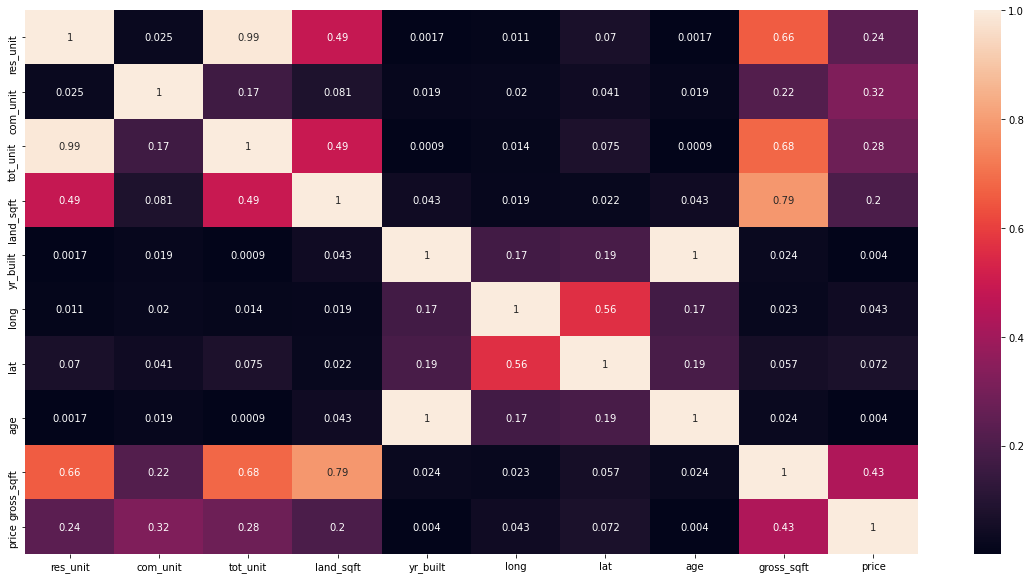

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(analysis_numerical_data.corr().abs(),  annot=True)



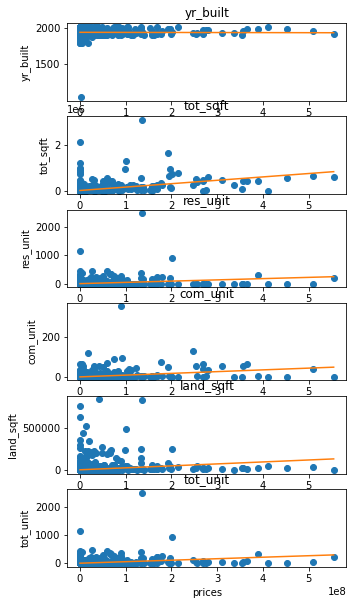

In [ ]:
from sklearn import preprocessing

prices = analysis_data['price']
feature_columns = ['yr_built', 'tot_sqft', 'res_unit', 'com_unit', 'land_sqft', 'tot_unit']
plt.figure(figsize=(5, 10))
plt.tight_layout(pad=10, w_pad=10, h_pad=10)

for i, col in enumerate(feature_columns):
    # 3 plots here hence 1, 3
    plt.subplot(6, 1, i+1)
    y = analysis_data[col]
    x = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.ylabel(col)
    plt.xlabel('prices')

In [ ]:
  
    for k, v in analysis_numerical_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(analysis_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column res_unit outliers = 10.69%
Column com_unit outliers = 100.00%
Column tot_unit outliers = 12.39%
Column land_sqft outliers = 6.71%
Column yr_built outliers = 3.01%
Column long outliers = 2.24%
Column lat outliers = 0.00%
Column age outliers = 3.01%
Column gross_sqft outliers = 9.76%
Column price outliers = 11.98%


### 2. Correlations between categorical columns

In [ ]:
### Numerical data for correlation 
cat_cols = ['borough', 'bldg_ctgy', 'block', 'lot', 'zip', 'tax_cls_s', 'bldg_cls_s']

analysis_categorical_data = analysis_data[cat_cols + ['price']].copy()
analysis_categorical_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27513 entries, 10686 to 3774
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   borough     27513 non-null  int64 
 1   bldg_ctgy   27513 non-null  object
 2   block       27513 non-null  int64 
 3   lot         27513 non-null  int64 
 4   zip         27513 non-null  int64 
 5   tax_cls_s   27513 non-null  int64 
 6   bldg_cls_s  27513 non-null  object
 7   price       27513 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.9+ MB


#### 4. Hot encode categories

In [ ]:
# importing one hot encoder from sklearn 
# There are changes in OneHotEncoder class 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
import pandas as pd
   
categories_to_encode = ['borough', 'bldg_ctgy', 'block', 'lot', 'zip', 'tax_cls_s', 'bldg_cls_s']
for column in categories_to_clean:
    # Creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # Passing building category column (label encoded values of bldg_ctgry)
    encoded_analysis_data = pd.DataFrame(enc.fit_transform(df2[[column]]).toarray())
    end = len(df2) -1

    # We reset the indexes of the different data frames and then merge them so that the one-hot encoding categories will be part of 
    # our cleaned dataset as well
    df2.reset_index(drop=True)
    encoded_analysis_data.reset_index(drop = True)
                   
df2.head()
encoded_analysis_data.head()
encoded_analysis_data.to_csv('cleaned_df.csv')

In [ ]:
max(df2.price)
min(df2.price)

1

In [ ]:
df3 = pd.read_csv('cleaned_df.csv', index_col=0, low_memory=False)


#### Outliers

In [ ]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Models

#### Prepare models

In [ ]:
# Spot Check Algorithms
# https://www.kaggle.com/vikrishnan/house-sales-price-using-regression#Load-dataset

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline    
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error


models = []
models.append(('LR', LinearRegression()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

# models.append(('LASSO', Lasso()))
# models.append(('EN', ElasticNet()))
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVR', SVR()))


#### Test and create base models

In [ ]:
# Split-out validation dataset
# NB: doesn't include categorical data

dataset = analysis_numerical_data
array = dataset.values

X = dataset.drop(columns=['price'])
Y = dataset.price
Y = np.array(Y).reshape(-1)

seed = 7
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 40)

num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

results = []
names = []
mae_results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: -117570920701891.593750 (67297443219772.226562)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RFR: -50533029150373.875000 (27744326943439.304688)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GBR: -61827818846575.398438 (31459060217547.714844)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: -68444351516884.859375 (40206104700868.664062)


#### Compare models

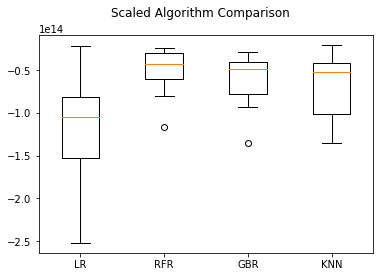

In [ ]:
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Ensembles

#### Model pipelines

In [ ]:
numeric_features = num_cols # NB: price is not part of num_cols? should it be
numeric_transformer = Pipeline([('scaler', StandardScaler())])

categorical_features = cat_cols # NB: price is not part of categorical_cols? should it be
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numeric_transformer, numeric_features),
    #              ('cat', categorical_transformer, categorical_features)
    ])



scaled_lr_pipeline = Pipeline([('Preprocessor', preprocessor),('LR', LinearRegression())])
scaled_gbr_pipeline = Pipeline([('Preprocessor', preprocessor),('regressor', GradientBoostingRegressor())])
scaled_knn_pipeline = Pipeline([('Preprocessor', preprocessor),('KNN', KNeighborsRegressor())])

# scaled_rfr_pipeline = Pipeline([('Preprocessor', preprocessor),('RFR', RandomForestRegressor())])


In [ ]:
ensembles = []
ensembles.append(('ScaledLR', scaled_lr_pipeline))
# ensembles.append(('ScaledRFR', scaled_rfr_pipeline))
ensembles.append(('ScaledGBR', scaled_gbr_pipeline))
ensembles.append(('ScaledKNN', scaled_knn_pipeline))

# ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
# ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
# ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
dataset.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLR: -117574889746419.343750 (67296793745532.937500)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledGBR: -61411032682614.484375 (32699115639180.234375)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledKNN: -87920371100290.906250 (52689063465356.742188)


(27513, 10)

### Compare

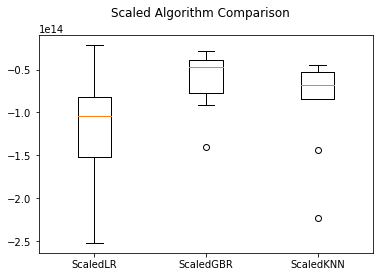

In [ ]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Fine tune

In [ ]:
# 'neg_mean_squared_error', metrics.mean_squared_error is used here
scoring_metrics = make_scorer(mean_squared_error, greater_is_better=False)
kfold = KFold(n_splits=num_folds, random_state=seed)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Fine tune gradient boost

In [ ]:
gradientBoost_param_grid = {
    'regressor__learning_rate':[0.01, 0.05, 0.1, 0.5],
    'regressor__max_depth':[3,4]
}


gradientBoost_grid_search = GridSearchCV(scaled_gbr_pipeline, gradientBoost_param_grid, scoring=scoring_metrics, cv=kfold)
gradientBoost_grid_result = gradientBoost_grid_search.fit(X_train, Y_train)


print(f"best score is {gradientBoost_grid_result.best_score_}, best parameter from grid search is {gradientBoost_grid_result.best_params_}")

best score is -56115423037641.42, best parameter from grid search is {'regressor__learning_rate': 0.1, 'regressor__max_depth': 4}


#### KNN Fine tuning

In [ ]:
import numpy 
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
knn_param_grid = dict(n_neighbors=k_values)


knn_grid_search = GridSearchCV(scaled_knn_pipeline, knn_param_grid, scoring=scoring_metrics, cv=kfold)
knn_grid_result = knn_grid_search.fit(X_train, Y_train)


print(f"best score is {knn_grid_result.best_score_}, best parameter from grid search is {knn_grid_result.best_params_}")

ValueError: Invalid parameter n_neighbors for estimator Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['res_unit', 'com_unit',
                                                   'tot_unit', 'land_sqft',
                                                   'yr_built', 'long', 'lat',
                                                   'age', 'gross_sqft'])])),
                ('KNN', KNeighborsRegressor())]). Check the list of available parameters with `estimator.get_params().keys()`.

### Overview

In [ ]:
print(f'GradientBoosting score is {np.sqrt(gradientBoost_grid_search.best_score_ * -1)}')
print(f'KNN score is {np.sqrt(knn_grid_result.best_score_ * -1)}')
print(f'LinearRegression score is {np.sqrt(lr_grid_search.best_score_ * -1)}')


GradientBoosting score is 7491022.829870526


NameError: name 'knn_grid_result' is not defined

### Prediction

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = {
   'regressor__learning_rate':0.01,
    'regressor__max_depth':4
}
model = GradientBoostingRegressor(random_state=seed, learning_rate=0.01, max_depth=4)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_absolute_error(y_test, predictions))


1704167.1961186961


In [ ]:
predictions=predictions.astype(int)
submission = pd.DataFrame({
        "Org House Price": y_test,
        "Pred House Price": predictions
    })

submission.to_csv("PredictedPrice.csv", index=False)

### TODO - Following part is not done yet....

In [ ]:
# R^2 scores
print('Train:', lr.score(X_train, y_train))
print('Test:', lr.score(X_test, y_test))

In [ ]:
#linear space
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
#log space
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.xlim(1,4e8)
plt.ylim(1,4e8)
plt.xscale('log')
plt.yscale('log')
plt.show()

### Questions?
From the plot we see that there does not seem to be some correlation between predicted and real prices, but only within limited ranges. 
What oddities can you in the dataset are illustrated by these figures? 
Think about how you will deal with them?

Another way to interpret our regression model is looking at the residual plot. In this plot, each point is one house price (observation), the prediction made by the model is on the x-axis and the residual of the prediction is on the y-axis. This distance from the line at 0 is how far off the prediction was for that value.

In [ ]:
import seaborn

seaborn.residplot(y_test, lr.predict(X_test))
plt.xlabel("Predicted prices")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

The residual plot indicates that there the y-axis of our dataset might be imbalanced. It furthermore seems like there are quite a few outliers in the data. Let's now check the Mean Absolute Error.

Mean Absolute Error is given by 
![image.png](attachment:image.png)


and basically captures the absolute difference between predicted and true target variables. Remember that prices are provided in US-Dollars.


In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, lr.predict(X_test)))

Comment on MAE?

In [ ]:
abs(y_test - y_test.mean()).mean()

Comment on a random prediction by this metric,? What features might and might not show things about house price

## To do:

- [ ] Tune hyperparameters how?
- [ ] Proper train / validation / test data split
- [ ] Remove extreme entries? How does this affect result (some visualisations before and after)
- [ ] What other information could you use to augment this dataset?  For example, look at the list of information sources here: https://github.com/CityOfNewYork/nyc-geo-metadata 
- [ ] What information could be relevant (correlated) with property price? How could you use include this information in the table above?


# Image Features Part 1 


In this project, contextual information is going to be provided in the form of satellite imagery. These images have the potential to give us insight into the features of a properties’ direct surroundings. Specifically, we will use features extracted from images from a (pretrained) Convolutional Neural Network (CNN).


#### Aerial images dataset
Aerial imagery is provided by the New York City Department of Information Technology & Telecommunications. Images are captured every two years during spring and summer months and cover the entire state of New York. We include the most recent images, which means 2018 in our case. Before being published, the images have been corrected to remove distortions caused by elevation changes and camera angles. Images are provided as four-band raster files in the .jp2 format and contain meta-information such as the geo-location of each image pixel, which is in a similarly projected coordinate system to the real estate sales data.

Link to the original image dataset: https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_AerialImagery.md

![image.png](attachment:image.png)

In order to generate a set of satellite images matching the locations of the sold houses, the .jp2 files from this dataset were first merged into a three-band (RGB) raster dataset, which when combined looks like the image above. In this file, each pixel corresponds to specicific geographic coordinates. 

With this file, for each house in the dataaset, a square image is cut from this mosaic. Th tile square has the house at its centre point and its surroundings are within a 500ft radius. More precisely, we take the house's coordinates and create a bounding box around them, where we set the size of the box to 1001x1001 feet. This bounding box is then used as a mask() function, which cuts out the part of the raster file which we are interested in. 

The resulting images are stored as colored .jpg files, with size set to 2000x2000 (pixels, not feet).  

For these operations, we used the [rasterio](https://rasterio.readthedocs.io/en/stable/api/rasterio.html) package, which allows us to read and process .jp2 files.

An example from the generated images looks like the below:

In [ ]:
# Requires pillow package --> conda install -c anaconda pillow

from PIL import Image

img = Image.open('12188.jpg')
img

Next, we need to get the feature representation. For this, we use a well known Convolutional Neural Network, Inception-V3, as a feature extractor. The network is pretrained on ImageNet [Imagenet](http://www.image-net.org/)  - a a large-scale dataset of natural images (animals, objects). Despite how far this training set may seem from satellite photos, several studies have shown that the generic descriptors extracted from such convolutional neural networks are very powerful and useful for various visual recognition tasks [[ref.]](https://arxiv.org/abs/1403.6382). 

Using this network, we extract our feature representation output from the first convolutional layer. We use this first layer as we assume this layer to provides the most generic visual image features. This is grounded in the assumption that filters from later layers might already be too specialized in detecting objects within the range of classes present in the Imagenet dataset, and thus returning features that are too specialized for dealing with satellite images.

In more simple terms, it means that we do not want the image descriptors to be specialized in describing a chair, tree or any other class from the Imagenet data. Instead we aim for more general features representing for instance edges and color blobs, which are most likely to be found in the very early convolutional layers of the network. 

#### Running the feature extractor

We start with loading the pre-trained Inception-V3 CNN model.

In [ ]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3

# Getting the InceptionV3 model
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(299, 299, 3))
                             
# Selecting the first convolutional layer as the output layer    
out = base_inception.layers[1].output

# Adding a global spatial average pooling layer to reduce the number of features
out = GlobalAveragePooling2D()(out)

model = Model(inputs=base_inception.input, outputs=out)

# Lock model parameters
for layer in base_inception.layers:
    layer.trainable = False
    
# show model summary
model.summary()

We see that the output is an array with length 32. These 32 elements represent the global averages of each convolution matrix in the first layer. In other words, the Global Average Pooling operation outputs the  spatial  average  of  each  feature  map. It can be visualized as follows: 

![image.png](attachment:image.png)

Next we initialize a Model object, which we will use to extract the image features.

In [ ]:
extract = Model(model.inputs, model.output)

# Empty dataframe to store the features in
df_visual = pd.DataFrame()

Lastly, we load the image and feed it through the CNN model. We end up with an array as explained above.

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Turning image into an arry
arr = np.array([img_to_array(load_img('12188.jpg', target_size=(299,299)))]).astype('float32')

# Normalizing
arr /= 255.

# Getting the feature vector
features = extract.predict(arr)
print('Image features:\n', features)
print('Array shape:', features.shape)

In [ ]:
# Adding the features into the dataframe

df_visual = df_visual.append(pd.DataFrame(features))
df_visual.head()

# Image Features Part 2

## Visual data extracted for (almost) all houses

We performed feature extraction for almost all houses in the sales dataset and stored the final dataframe in a .csv file. The only houses not confisered were found to lie outside the geographic bounds of the image raster and have therefore could not be considered. The .csv file also contains the sale and building IDs so you can match them to the house prices dataset.

See the final .csv file below.

In [ ]:
df_img = pd.read_csv('sales_data_2015_DF-inception-conv.csv', index_col=0)
df_img.head()

In [ ]:
df_img.info()

### To do:

- [ ] Combine these visual features from satellite imagery into the original house price dataframe. 
- [ ] Find what features are useful? How useful? Which models to could use? 
